## Different distances calulations

In [1]:
#important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Read data
df = pd.read_csv('Iris.csv')
df_raw = df.copy()
df_raw.drop(['Id','Species'], axis=1, inplace=True)
df_raw

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
#Distances between points
#Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))
#Manhattan distance
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))
#Minkowski distance
def minkowski_distance(x1, x2, p):
    return np.power(np.sum(np.power(np.abs(x1 - x2), p)), 1/p)
#Cosine distance
def cosine_distance(x1, x2):
    return 1 - np.dot(x1, x2)/(np.linalg.norm(x1)*np.linalg.norm(x2))
#Jaccard distance
def jaccard_distance(x1, x2):
    return 1 - np.sum(np.minimum(x1, x2))/np.sum(np.maximum(x1, x2))
#Hamming distance
def hamming_distance(x1, x2):
    return np.sum(x1 != x2)/len(x1)
#Mahalanobis distance
def mahalanobis_distance(x1, x2, V):
    return np.sqrt(np.dot(np.dot((x1 - x2), np.linalg.inv(V)), (x1 - x2).T))

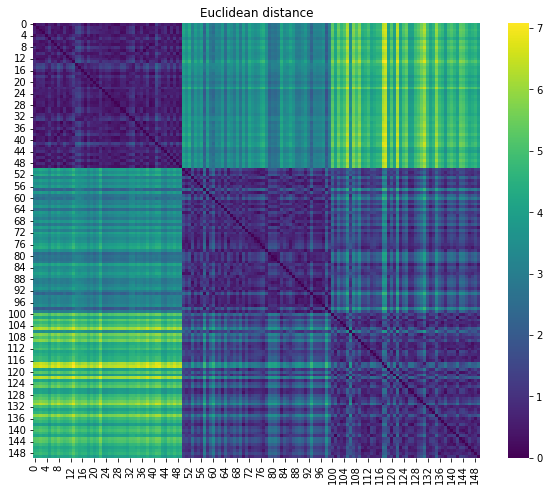

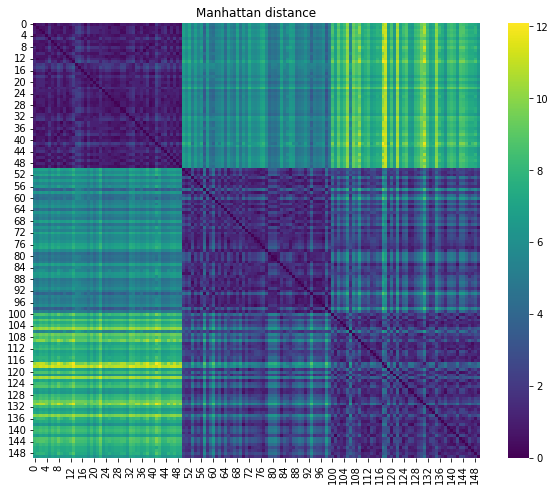

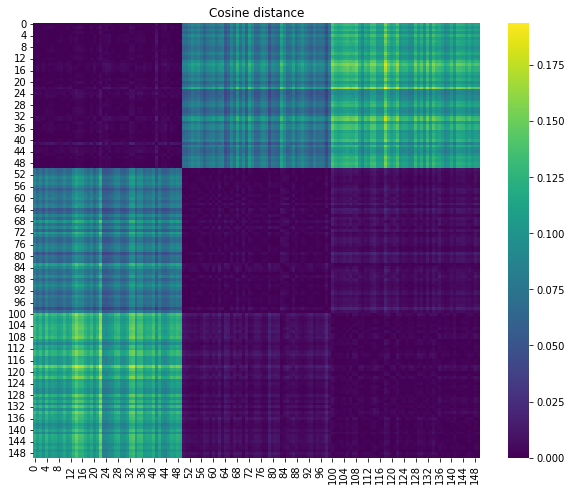

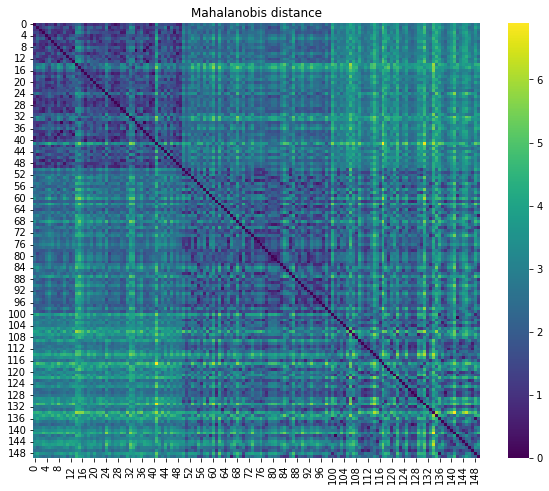

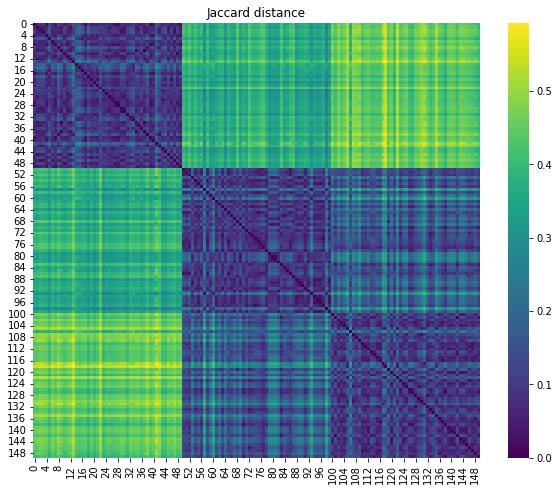

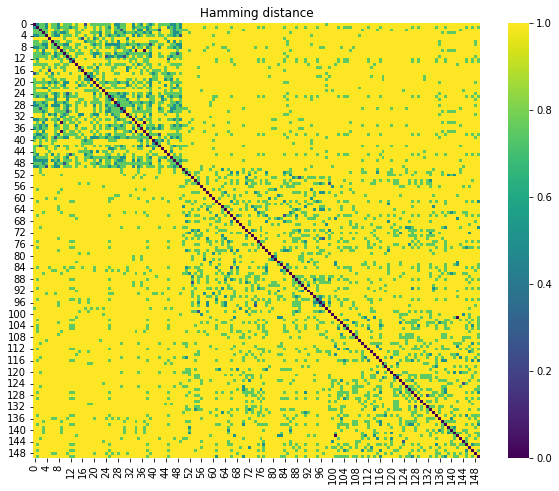

In [19]:
#Generate matrix of distances
def distance_matrix(X, distance):
    if distance != mahalanobis_distance:
        n = X.shape[0]
        D = np.zeros((n, n))
        for i in range(n):
            for j in range(i, n):
                D[i, j] = distance(X[i], X[j])
                D[j, i] = D[i, j]
    else:
        n = X.shape[0]
        D = np.zeros((n, n))
        V=np.cov(X.T)
        for i in range(n):
            for j in range(i, n):
                D[i, j] = distance(X[i], X[j], V)
                D[j, i] = D[i, j]
    return D

#plotting a heatmap of the matrix of distances
def plot_distance_matrix(D, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(D,cmap='viridis')
    plt.title(title)
    plt.show()

plot_distance_matrix(distance_matrix(df_raw.values, euclidean_distance), 'Euclidean distance')
plot_distance_matrix(distance_matrix(df_raw.values, manhattan_distance), 'Manhattan distance')
plot_distance_matrix(distance_matrix(df_raw.values, cosine_distance), 'Cosine distance')
plot_distance_matrix(distance_matrix(df_raw.values, mahalanobis_distance), 'Mahalanobis distance')
plot_distance_matrix(distance_matrix(df_raw.values, jaccard_distance), 'Jaccard distance')
plot_distance_matrix(distance_matrix(df_raw.values, hamming_distance), 'Hamming distance')
